# Cats Vs Dogs ML Project 


-Dimple.K

In [1]:
conda install tensorflow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install keras 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dimp1\anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-2.4.3                |       hd3eb1b0_0           6 KB
    keras-base-2.4.3           |     pyhd3eb1b0_0          30 KB
    ------------------------------------------------------------
                                           Total:          36 KB

The following NEW packages will be INSTALLED:

  keras              pkgs/main/noarch::keras-2.4.3-hd3eb1b0_0
  keras-base         pkgs/main/noarch::keras-base-2.4.3-pyhd3eb1b0_0




keras-2.4.3          | 6 KB      |            |   0% 
keras-2.4.3          | 6 KB      | ########## | 100% 
keras-2.4.3          | 6 KB      | ########## | 100% 

keras-base-2.4.3     | 30 KB     |            |   0% 
keras-base-2.4.3     | 30 KB     | ########## 

In [32]:
#importing libraries
import tensorflow as tf

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
#data preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


In [53]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


In [54]:
#building cnn model
#initialise model

cnn=tf.keras.models.Sequential()

In [55]:
#convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [56]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [57]:
#add another layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [58]:
#flatten
cnn.add(tf.keras.layers.Flatten())

In [59]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [60]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [61]:
#compile the model
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
#train the model
history = cnn.fit(x=train_generator, validation_data=validation_generator, epochs=30)

Epoch 1/30
251/251 [==============================] - 67s 269ms/step - loss: 0.3844 - accuracy: 0.8234 - val_loss: 0.4727 - val_accuracy: 0.7968
Epoch 2/30
251/251 [==============================] - 61s 244ms/step - loss: 0.3673 - accuracy: 0.8297 - val_loss: 0.4641 - val_accuracy: 0.7949
Epoch 3/30
251/251 [==============================] - 63s 253ms/step - loss: 0.3496 - accuracy: 0.8448 - val_loss: 0.5397 - val_accuracy: 0.7672
Epoch 4/30
251/251 [==============================] - 79s 316ms/step - loss: 0.3305 - accuracy: 0.8506 - val_loss: 0.4929 - val_accuracy: 0.7865
Epoch 5/30
251/251 [==============================] - 62s 247ms/step - loss: 0.3123 - accuracy: 0.8668 - val_loss: 0.5541 - val_accuracy: 0.7731
Epoch 6/30
251/251 [==============================] - 62s 246ms/step - loss: 0.3042 - accuracy: 0.8692 - val_loss: 0.5052 - val_accuracy: 0.8003
Epoch 7/30
251/251 [==============================] - 63s 252ms/step - loss: 0.2773 - accuracy: 0.8814 - val_loss: 0.5215 - val_ac

In [75]:
#make single prediction
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("dataset/single_prediction/predict2.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

In [76]:
prediction

'dog'

In [77]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


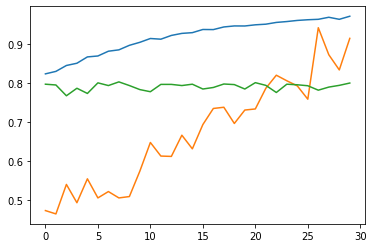

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])